In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import normaltest
import statsmodels.api as sm
import numpy as np
import pylab as py

In [2]:
#Accepts a dataframe and finds mean and SEM according to groupby criteria.
def handy_means(df, criteria, col):
    data = df.groupby(criteria).mean().join(df.groupby(criteria).sem(),lsuffix='',rsuffix = 'SEM')[col]
    return data

In [3]:
df = pd.read_excel("UmamiSalivation.xlsx", sheet_name='raw')

In [4]:
df.head()

,Date,Time,Trial,Target,Tastant,Empty,Pre,Post,Point,Saliva (mg)
0,20210805,0,1,Posterior,Umami,0.9865,0.9921,0.9930,NaN,0.9
1,20210805,30,1,Posterior,Umami,0.9806,0.9863,0.9895,NaN,3.2
2,20210805,120,1,Posterior,Umami,0.9833,0.9885,0.9913,NaN,2.8
3,20210805,0,1,Posterior,H2O,0.9803,0.9862,0.9870,NaN,0.8
4,20210805,30,1,Posterior,H2O,0.9855,0.9914,0.9923,NaN,0.9


In [5]:
Posterior = pd.DataFrame(df[df['Target']=="Posterior"])
Posterior = pd.DataFrame(Posterior[Posterior['Time']==30])
Posterior.head()

,Date,Time,Trial,Target,Tastant,Empty,Pre,Post,Point,Saliva (mg)
1,20210805,30,1,Posterior,Umami,0.9806,0.9863,0.9895,NaN,3.2
4,20210805,30,1,Posterior,H2O,0.9855,0.9914,0.9923,NaN,0.9
13,20210805,30,2,Posterior,Umami,0.9739,0.9793,0.9812,NaN,1.9
16,20210805,30,2,Posterior,H2O,0.9777,0.9832,0.9844,NaN,1.2
25,20210805,30,3,Posterior,Umami,0.9819,0.9877,0.9889,NaN,1.2


In [6]:
Anterior = pd.DataFrame(df[df['Target']=="Anterior"])
Anterior = pd.DataFrame(Anterior[Anterior['Time']==30])
Anterior.head()

,Date,Time,Trial,Target,Tastant,Empty,Pre,Post,Point,Saliva (mg)
7,20210805,30,1,Anterior,Umami,0.9577,0.9630,0.9642,NaN,1.2
10,20210805,30,1,Anterior,H2O,0.9723,0.9777,0.9783,NaN,0.6
19,20210805,30,2,Anterior,Umami,0.9794,0.9848,0.9857,NaN,0.9
22,20210805,30,2,Anterior,H2O,0.9883,0.9932,0.9937,NaN,0.5
31,20210805,30,3,Anterior,Umami,0.9814,0.9870,0.9877,NaN,0.7


In [7]:
to_plot = df[df['Time']==30][['Date', 'Trial', 'Target', 'Tastant', 'Saliva (mg)']]

to_plot = to_plot.groupby(['Tastant', 'Target', 'Date']).mean()
to_plot.reset_index(inplace=True)

to_plot=to_plot.set_index(['Target']).sort_index(ascending = True).reset_index()

to_plot

,Target,Tastant,Date,Trial,Saliva (mg)
0,Anterior,H2O,20210805,2,0.533333
1,Anterior,H2O,20210811,2,1.066667
2,Anterior,H2O,20210817,2,0.300000
3,Anterior,H2O,20220202,2,1.100000
4,Anterior,H2O,20220203,2,0.966667
5,Anterior,Umami,20220203,2,1.166667
6,Anterior,Umami,20220202,2,1.166667
7,Anterior,Umami,20210805,2,0.933333
8,Anterior,Umami,20210811,2,0.800000
9,Anterior,Umami,20210817,2,0.766667


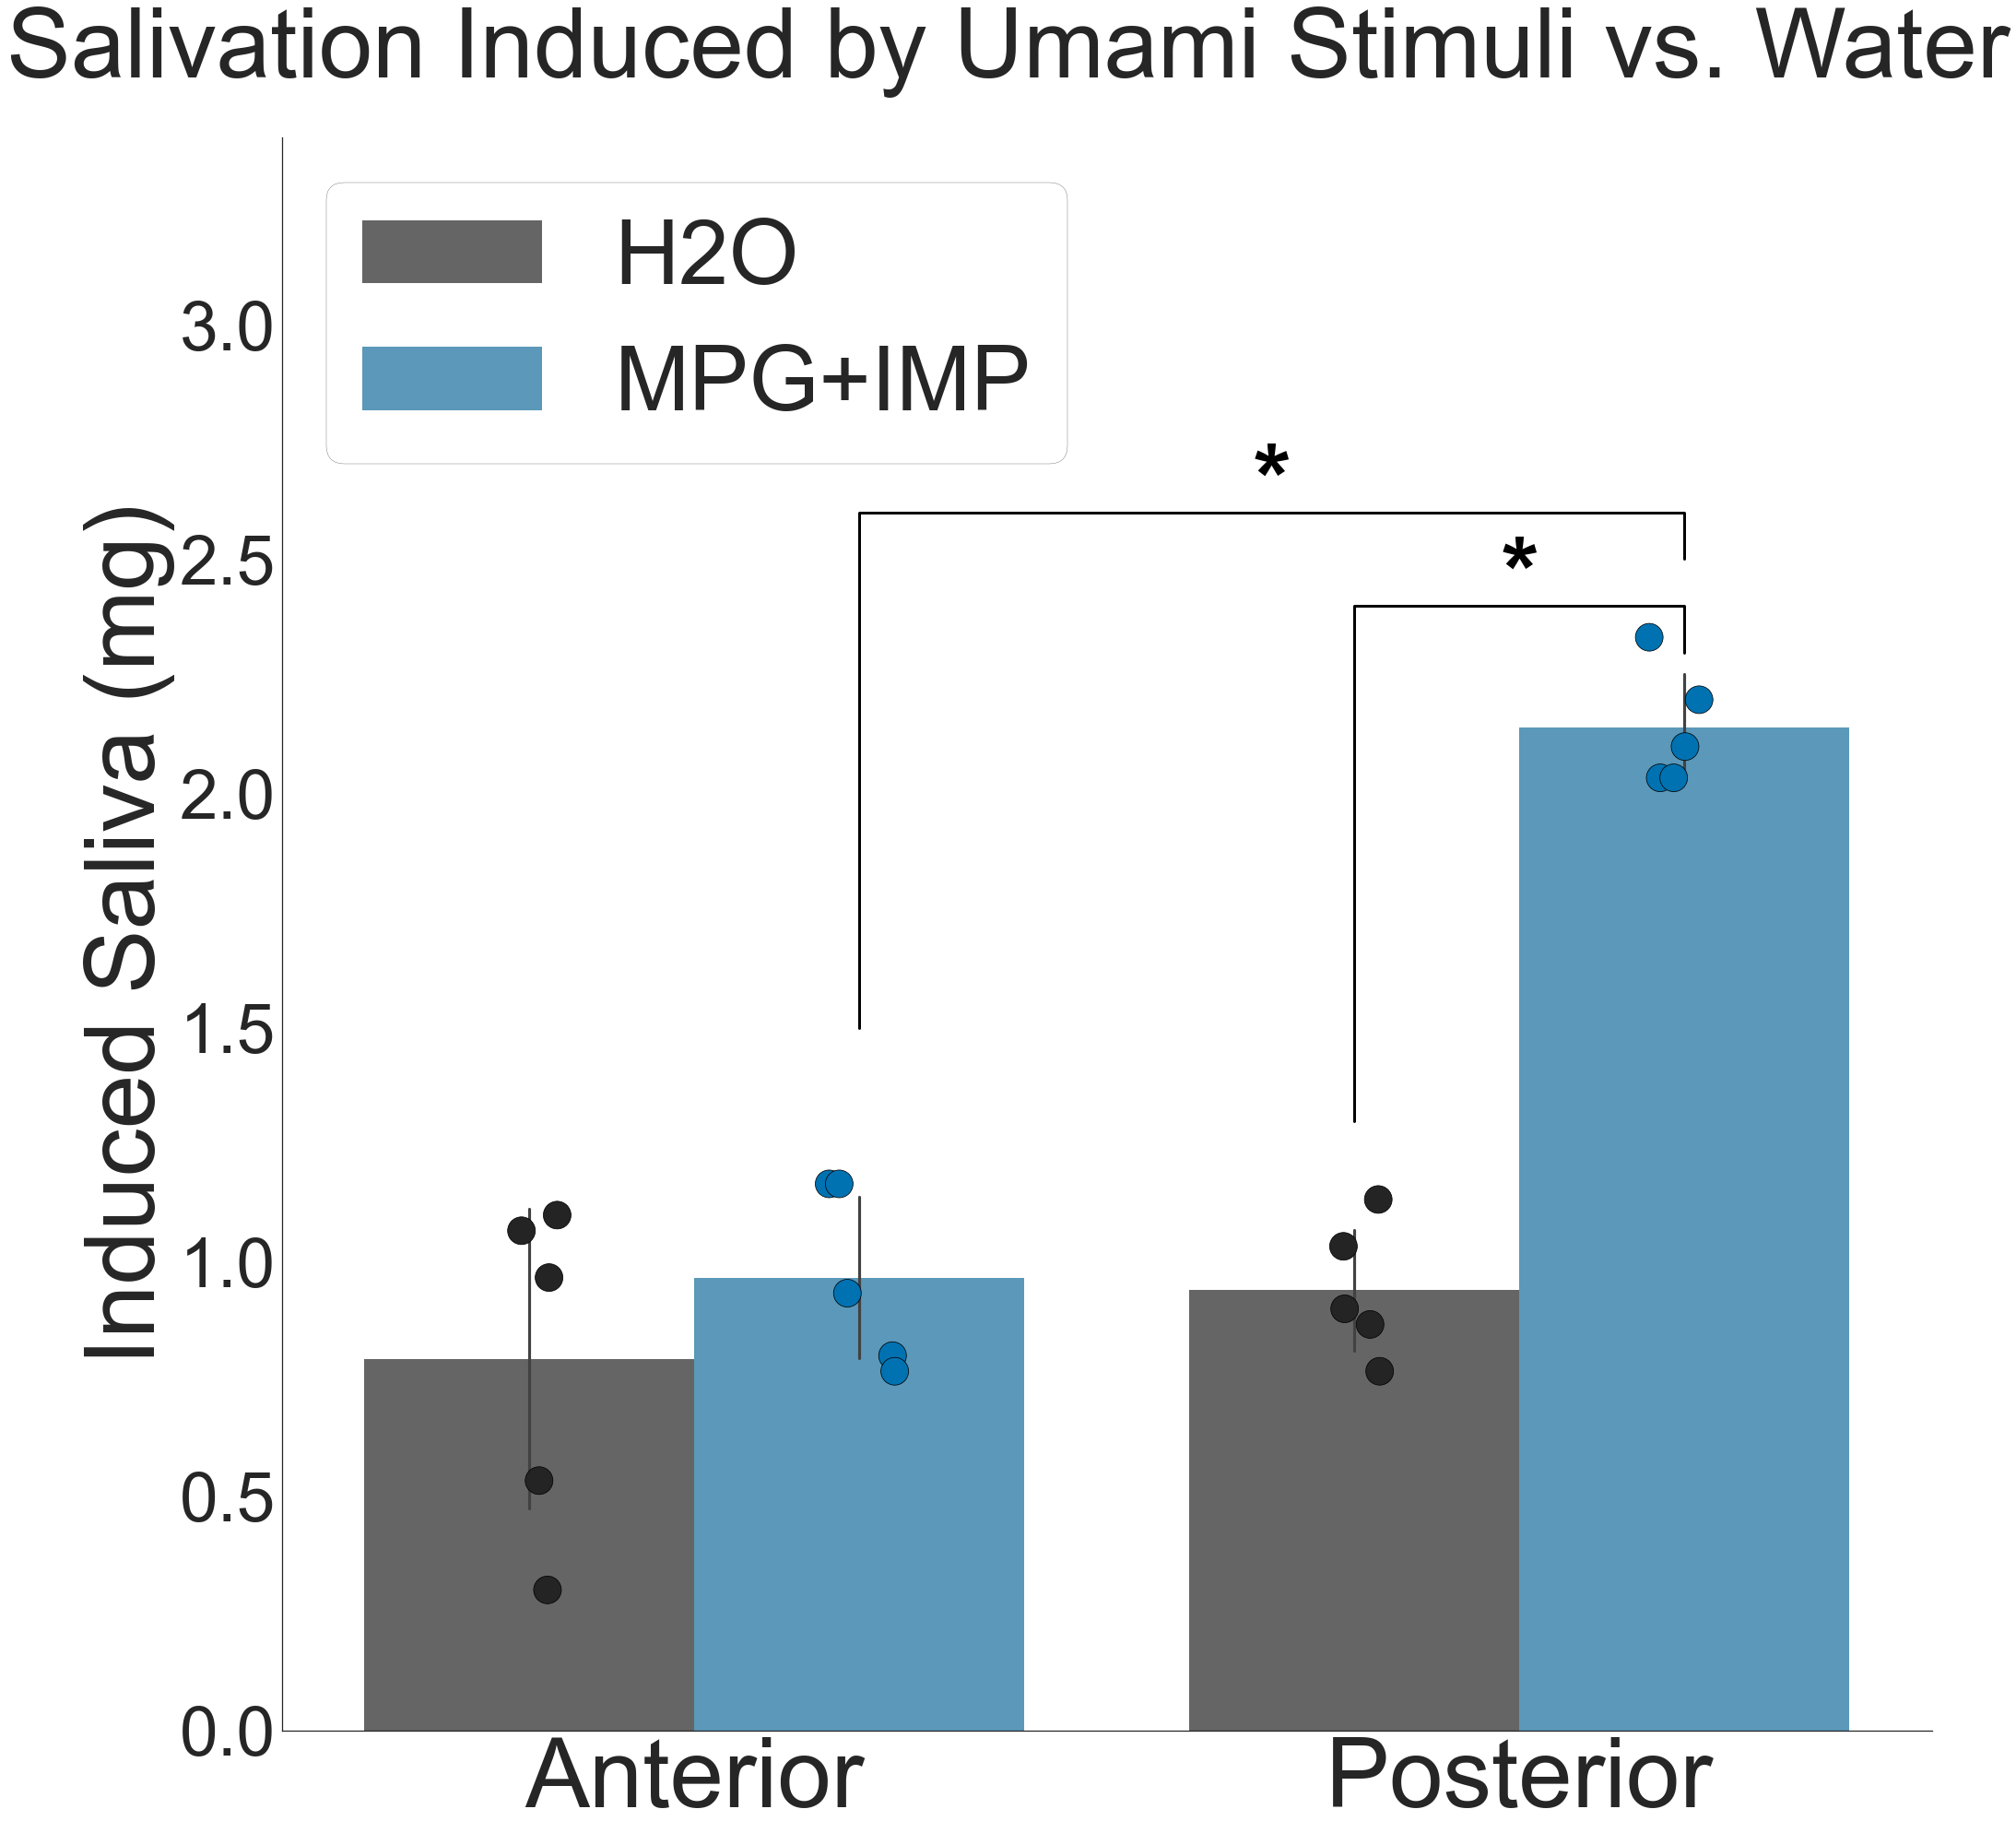

In [32]:

def color(number):
    return sns.color_palette('colorblind')[number]
colors = {'H2O':sns.color_palette('gray')[0], 'MPG+IMP':color(0)}

my_font = 75
old_name = ['Umami']
new_name = ['MPG+IMP']
to_plot =to_plot.replace(old_name, new_name)

sns.set(font_scale = 6)

sns.set_style(style = "white")
# Draw the bar chart
fig, ax = plt.subplots(figsize = (30,30))
ax.set_ylim(0,3.4)
sns.barplot(
    data=to_plot, 
    x="Target", 
    y="Saliva (mg)", 
    hue="Tastant", 
    alpha=0.7, 
    ci='sd',
    palette = colors,
)

# Get the legend from just the bar chart
handles, labels = ax.get_legend_handles_labels()

# Draw the stripplot
sns.stripplot(
    data=to_plot, 
    x="Target", 
    y="Saliva (mg)", 
    hue="Tastant", 
    dodge=True, 
    edgecolor="black", 
    linewidth=.75,
    ax=ax,
    jitter = 0.1,
    size = 30,
    palette = colors,
)
# Remove the old legend
ax.legend_.remove()
# Add just the bar chart legend back
ax.legend(
    handles,
    labels,
    loc='upper left',
    #bbox_to_anchor=(1.25, .5),
    fontsize = my_font*1.3,
    frameon = True,
    edgecolor = 'k',
)

ax.set_ylabel('Induced Saliva (mg)', fontsize = my_font*1.4)
ax.set_xlabel('')

#Significance Bars
sig_bar = 2.5
comp = 0.2
plt.plot([1.2,1.2, comp, comp], [sig_bar, sig_bar+0.1, sig_bar+0.1, sig_bar-1], linewidth=3, color='k')
plt.text(0.7, sig_bar+0.1, "*", horizontalalignment='center', size='x-large', color='black', weight='semibold')

sig_bar = 2.3
comp = 0.8
plt.plot([1.2,1.2, comp, comp], [sig_bar, sig_bar+0.1, sig_bar+0.1, sig_bar-1], linewidth=3, color='k')
plt.text(0.5*(comp+1.2), sig_bar+0.1, "*", horizontalalignment='center', size='x-large', color='black', weight='semibold')

#Deal with the tick sizes and title
sns.despine()
plt.yticks(fontsize = my_font)
plt.xticks(fontsize = my_font*1.4)
plt.gcf().suptitle("Salivation Induced by Umami Stimuli vs. Water",fontsize=my_font*1.4)
plt.gcf().tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig(fname = 'Umami_Salivation_Averaged')

AttributeError: module 'matplotlib.pyplot' has no attribute 'border'